In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures,load_robot_execution_failures

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
download_robot_execution_failures()

In [5]:
timeseries, y = load_robot_execution_failures()

In [6]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [7]:
timeseries['id'].nunique()

88

In [8]:
timeseries['time'].nunique()

15

In [9]:
y.head()

1    True
2    True
3    True
4    True
5    True
dtype: bool

In [10]:
print(timeseries.shape,y.shape)

(1320, 8) (88,)


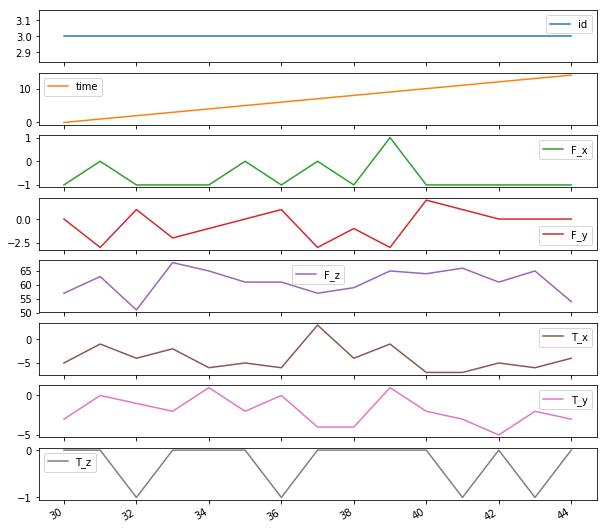

In [11]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

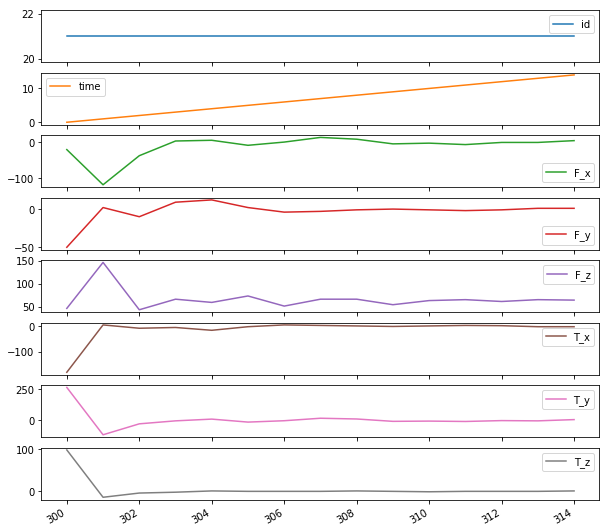

In [12]:
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [13]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time",n_jobs=8)

Feature Extraction: 100%|██████████| 38/38 [00:08<00:00,  5.88it/s]


In [14]:
type(extracted_features)

pandas.core.frame.DataFrame

In [15]:
extracted_features.shape

(88, 4764)

In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [17]:
extracted_features.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""stderr""",F_x__approximate_entropy__m_2__r_0.1,F_x__approximate_entropy__m_2__r_0.3,F_x__approximate_entropy__m_2__r_0.5,F_x__approximate_entropy__m_2__r_0.7,F_x__approximate_entropy__m_2__r_0.9,F_x__ar_coefficient__k_10__coeff_0,F_x__ar_coefficient__k_10__coeff_1,F_x__ar_coefficient__k_10__coeff_2,F_x__ar_coefficient__k_10__coeff_3,F_x__ar_coefficient__k_10__coeff_4,"F_x__augmented_dickey_fuller__attr_""pvalue""","F_x__augmented_dickey_fulle

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [ ]:
features_filtered.shape

In [ ]:
features_filtered.head()

In [ ]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time',n_jobs=8)

In [ ]:
features_filtered_direct.shape

In [ ]:
train_metadata = pd.read_csv('training_set_metadata.csv')
train = pd.read_csv('training_set.csv')

In [ ]:
train.head()

In [ ]:
from tsfresh import extract_features
extracted_features = extract_features(train.iloc[:,:4], column_id="object_id", column_sort="mjd",n_jobs=8)

In [ ]:
extracted_features = extracted_features.reset_index(drop=False)

In [ ]:
extracted_features = extracted_features.rename(columns={'id':'object_id'})

In [ ]:
extracted_features = extracted_features.reset_index(drop=True)

In [ ]:
extracted_features.columns = list(extracted_features.columns.values)

In [ ]:
extracted_features.head()

In [ ]:
print(extracted_features.shape)

In [ ]:
extracted_features.columns[-5:]

In [ ]:
extracted_features_id = extracted_features['id']

In [ ]:
klm_train = pd.read_csv('klm_train.csv')

In [ ]:
klm_train.head()

In [ ]:
klm_train.shape

In [ ]:
used_features = [x for x in list(extracted_features.columns) if x not in list(klm_train.columns)]

In [ ]:
print(len(used_features))

In [ ]:
klm_train = klm_train.merge(extracted_features[used_features + ['object_id']],on='object_id',how='left')

In [ ]:
klm_train.head()

In [ ]:
import sys, os
import argparse
import time
from datetime import datetime as dt
import gc; gc.enable()
from functools import partial, wraps

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
np.warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
from tsfresh.feature_extraction import extract_features
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from numba import jit

np.random.seed(51)

In [ ]:
def multi_weighted_logloss(y_true, y_preds, classes, class_weights):
    """
    refactor from
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    y_p = y_preds.reshape(y_true.shape[0], len(classes), order='F')
    # Trasform y_true in dummies
    y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1 - 1e-15)
    # Transform to log
    y_p_log = np.log(y_p)
    # Get the log for ones, .values is used to drop the index of DataFrames
    # Exclude class 99 for now, since there is no class99 in the training set
    # we gave a special process for that class
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).values.astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weights[k] for k in sorted(class_weights.keys())])
    y_w = y_log_ones * class_arr / nb_pos

    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss


In [ ]:
def lgbm_multi_weighted_logloss(y_true, y_preds):
    """
    refactor from
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    # Taken from Giba's topic : https://www.kaggle.com/titericz
    # https://www.kaggle.com/c/PLAsTiCC-2018/discussion/67194
    # with Kyle Boone's post https://www.kaggle.com/kyleboone
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weights = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}

    loss = multi_weighted_logloss(y_true, y_preds, classes, class_weights)
    return 'wloss', loss, False

In [ ]:
def xgb_multi_weighted_logloss(y_predicted, y_true, classes, class_weights):
    loss = multi_weighted_logloss(y_true.get_label(), y_predicted,
                                  classes, class_weights)
    return 'wloss', loss

In [ ]:
def save_importances(importances_):
    mean_gain = importances_[['gain', 'feature']].groupby('feature').mean()
    importances_['mean_gain'] = importances_['feature'].map(mean_gain['gain'])
    return importances_

In [ ]:
def lgbm_modeling_cross_validation(params,
                                   full_train,
                                   y,
                                   classes,
                                   class_weights,
                                   nr_fold=5,
                                   random_state=51):

    # Compute weights
    w = y.value_counts()
    weights = {i : np.sum(w) / w[i] for i in w.index}

    clfs = []
    importances = pd.DataFrame()
    folds = StratifiedKFold(n_splits=nr_fold,
                            shuffle=True,
                            random_state=random_state)

    oof_preds = np.zeros((len(full_train), np.unique(y).shape[0]))
    for fold_, (trn_, val_) in enumerate(folds.split(y, y)):
        trn_x, trn_y = full_train.iloc[trn_], y.iloc[trn_]
        val_x, val_y = full_train.iloc[val_], y.iloc[val_]

        clf = LGBMClassifier(**params)
        clf.fit(
            trn_x, trn_y,
            eval_set=[(trn_x, trn_y), (val_x, val_y)],
            eval_metric=lgbm_multi_weighted_logloss,
            verbose=100,
            early_stopping_rounds=50,
            sample_weight=trn_y.map(weights)
        )
        clfs.append(clf)

        oof_preds[val_, :] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)
        print('no {}-fold loss: {}'.format(fold_ + 1,
              multi_weighted_logloss(val_y, oof_preds[val_, :],
                                     classes, class_weights)))

        imp_df = pd.DataFrame({
                'feature': full_train.columns,
                'gain': clf.feature_importances_,
                'fold': [fold_ + 1] * len(full_train.columns),
                })
        importances = pd.concat([importances, imp_df], axis=0, sort=False)

    score = multi_weighted_logloss(y_true=y, y_preds=oof_preds,
                                   classes=classes, class_weights=class_weights)
    print('MULTI WEIGHTED LOG LOSS: {:.5f}'.format(score))
    df_importances = save_importances(importances_=importances)
    df_importances.to_csv('lgbm_importances.csv', index=False)

    return clfs, score

In [ ]:
full_train = klm_train.copy()

In [ ]:
if 'target' in full_train:
    y = full_train['target']
    del full_train['target']

classes = sorted(y.unique())

In [ ]:
# Taken from Giba's topic : https://www.kaggle.com/titericz
# https://www.kaggle.com/c/PLAsTiCC-2018/discussion/67194
# with Kyle Boone's post https://www.kaggle.com/kyleboone
class_weights = {c: 1 for c in classes}
class_weights.update({c:2 for c in [64, 15]})
print('Unique classes : {}, {}'.format(len(classes), classes))
print(class_weights)
#sanity check: classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
#sanity check: class_weights = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
#if len(np.unique(y_true)) > 14:
#    classes.append(99)
#    class_weights[99] = 2

In [ ]:
if 'object_id' in full_train:
    oof_df = full_train[['object_id']]
    del full_train['object_id']
    #del full_train['distmod']
    #del full_train['hostgal_specz']
    del full_train['ra'], full_train['decl'], full_train['gal_l'], full_train['gal_b']
    del full_train['ddf']

In [ ]:
train_mean = full_train.mean(axis=0)
#train_mean.to_hdf('train_data.hdf5', 'data')
pd.set_option('display.max_rows', 500)
#import pdb; pdb.set_trace()
full_train.fillna(0, inplace=True)

In [ ]:
eval_func = partial(lgbm_modeling_cross_validation,
                    full_train=full_train,
                    y=y,
                    classes=classes,
                    class_weights=class_weights,
                    nr_fold=5,
                    random_state=51)

In [ ]:
pd.Series(full_train.dtypes).head(5)

In [ ]:
best_params = {
        'device': 'cpu',
        'objective': 'multiclass',
        'num_class': 14,
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'max_depth': 7,
        'n_estimators': 500,
        'subsample_freq': 2,
        'subsample_for_bin': 5000,
        'min_data_per_group': 100,
        'max_cat_to_onehot': 4,
        'cat_l2': 1.0,
        'cat_smooth': 59.5,
        'max_cat_threshold': 32,
        'metric_freq': 10,
        'verbosity': -1,
        'metric': 'multi_logloss',
        'xgboost_dart_mode': False,
        'uniform_drop': False,
        'colsample_bytree': 0.5,
        'drop_rate': 0.173,
        'learning_rate': 0.0267,
        'max_drop': 5,
        'min_child_samples': 10,
        'min_child_weight': 100.0,
        'min_split_gain': 0.1,
        'num_leaves': 7,
        'reg_alpha': 0.1,
        'reg_lambda': 0.00023,
        'skip_drop': 0.44,
        'subsample': 0.75}

In [ ]:
best_params.update({'n_estimators': 1000})

# modeling from CV
clfs, score = eval_func(best_params)